<a href="https://colab.research.google.com/github/haneligeo99/nycWeatherPatterns/blob/main/nycWeather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import all needed directories
import pandas as pd
import seaborn as sns
from datetime import datetime, date
import matplotlib.pyplot as plt
import pydotplus

from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_graphviz
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from io import StringIO

In [ ]:
#upload from local drive
from google.colab import files
uploaded = files.upload()

Saving nycWeather2.xls to nycWeather2.xls


In [ ]:
from numpy import float64
import io

#read in Excel file
nycWeather = pd.read_excel(io.BytesIO(uploaded['nycWeather2.xls']))

# Dataset is now stored in a Pandas Dataframe

In [ ]:
#Correct date type so pnadas recognizes it's type as a date
nycWeather["Date"] = pd.to_datetime(nycWeather["Date"], errors = "ignore", format = "%Y-%m-%d", exact = False)

In [ ]:
nycWeather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56400 entries, 0 to 56399
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    56400 non-null  datetime64[ns]
 1   TMAX    56370 non-null  float64       
 2   TMIN    56369 non-null  float64       
 3   TAVG    56399 non-null  float64       
 4   PRCP    56400 non-null  float64       
 5   SNOW    56224 non-null  float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 2.6 MB


In [ ]:
#nycWeather["Month"] = nycWeather["Date"].apply(lambda x: int(x[5:7]))
#nycWeather["Year"] = nycWeather["Date"].apply(lambda x: int(x[0:4]))
#nycWeather["yearMonth"] = nycWeather.apply(lambda df: date(df.Year, df.Month, 1), axis = 1)

In [ ]:
nycWeather.head()

,Date,TMAX,TMIN,TAVG,PRCP,SNOW
0,1869-01-01,29.0,19.0,24.0,0.75,9.0
1,1869-01-02,27.0,21.0,24.0,0.03,0.0
2,1869-01-03,35.0,27.0,31.0,0.00,0.0
3,1869-01-04,37.0,34.0,35.5,0.18,0.0
4,1869-01-05,43.0,37.0,40.0,0.05,0.0


In [ ]:
#quick check to see amt of precipitation over the years
sns.lineplot(nycWeather, x = "Date", y = "PRCP")

In [ ]:
#Create a function that will get months of a season (SPR, SUM, FALL, WIN)
def getMonths(input, m1, m2, m3):
    return input.loc[(input.Date.dt.month==m1) | (input.Date.dt.month==m2) | (input.Date.dt.month==m3)]

In [ ]:
#Use the function to seperate Seasons
spring = getMonths(nycWeather, 3, 4, 5)
summer = getMonths(nycWeather, 6, 7, 8)
fall = getMonths(nycWeather, 9, 10, 11)
winter = getMonths(nycWeather, 12, 1, 2)

In [ ]:
spring.head()

In [ ]:
summer.head()

,Date,TMAX,TMIN,TAVG,PRCP,SNOW
144,1869-06-01,79.0,70.0,74.5,0.00,0.0
145,1869-06-02,70.0,64.0,67.0,0.08,0.0
146,1869-06-03,83.0,66.0,74.5,0.00,0.0
147,1869-06-04,73.0,63.0,68.0,0.00,0.0
148,1869-06-05,82.0,66.0,74.0,0.08,0.0


In [ ]:
winter.shape

In [ ]:
#Use groupby/aggregate functions to find AVG temps for each season
winterAvgTemp = winter.groupby(winter.Date.dt.year).agg(winMonthAvg = ('TAVG', 'mean'),
                                                        winPRCP_avg = ('PRCP', 'mean'))
springAvgTemp = spring.groupby(spring.Date.dt.year).agg(sprMonthAvg = ('TAVG', 'mean'))
summerAvgTemp = summer.groupby(summer.Date.dt.year).agg(sumMonthAvg = ('TAVG', 'mean'))
fallAvgTemp = fall.groupby(fall.Date.dt.year).agg(fallMonthAvg = ('TAVG', 'mean'))

In [ ]:
winterAvgTemp = winterAvgTemp.reset_index()
springAvgTemp = springAvgTemp.reset_index()
summerAvgTemp = summerAvgTemp.reset_index()
fallAvgTemp = fallAvgTemp.reset_index()

In [ ]:
sns.lineplot(winterAvgTemp, x = 'Date', y = 'winMonthAvg', color = "royalblue")

In [ ]:
sns.lineplot(springAvgTemp, x = "Date", y = "sprMonthAvg", color = "plum")

In [ ]:
sns.lineplot(summerAvgTemp, x = "Date", y = "sumMonthAvg", color = "seagreen")

In [ ]:
sns.lineplot(fallAvgTemp, x = "Date", y = "fallMonthAvg", color = "chocolate")

<Axes: xlabel='Date', ylabel='winMonthAvg'>

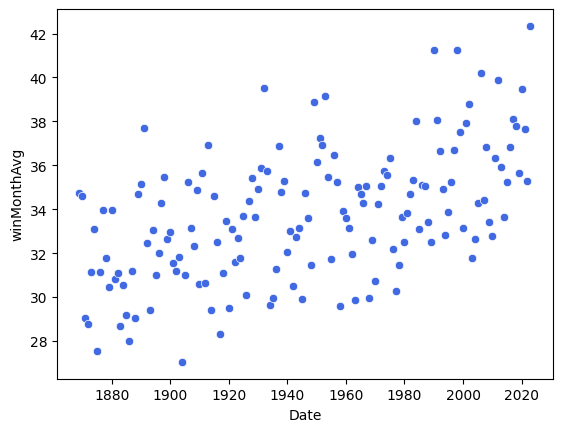

In [ ]:
sns.scatterplot(winterAvgTemp, x = 'Date', y = 'winMonthAvg', color = "royalblue")

In [ ]:
sns.scatterplot(springAvgTemp, x = "Date", y = "sprMonthAvg", color = "plum")

In [ ]:
sns.scatterplot(summerAvgTemp, x = "Date", y = "sumMonthAvg",color = "seagreen")

In [ ]:
sns.scatterplot(fallAvgTemp, x = "Date", y = "fallMonthAvg", color = "chocolate")

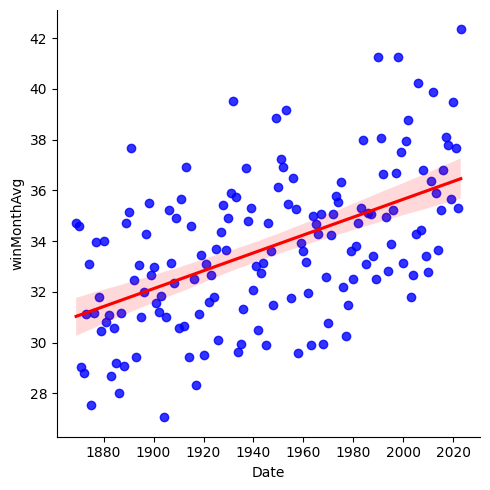

In [ ]:
sns.lmplot(winterAvgTemp, x = "Date", y = "winMonthAvg",
           scatter_kws = {"color":"b"}, line_kws = {"color":"red"})

In [ ]:
sns.lmplot(springAvgTemp, x = "Date", y = "sprMonthAvg",
           scatter_kws = {"color":"m"}, line_kws = {"color":"red"})

In [ ]:
winterAvgTemp.corr()

,Date,winMonthAvg,winPRCP_avg
Date,1.000000,0.531373,0.081100
winMonthAvg,0.531373,1.000000,0.082678
winPRCP_avg,0.081100,0.082678,1.000000


In [ ]:
#Split dataset in features and target variable
feature_cols = ["Date", "winPRCP_avg"]
x = winterAvgTemp[feature_cols]
y = winterAvgTemp.winMonthAvg

In [ ]:
# Use train_test_split to split dataset into training set and test set
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
x_train = x.query("Date < 1870")

In [ ]:
x_test = x.query("Date >= 1870")

In [ ]:
y_train = winterAvgTemp.query("Date < 1870").winMonthAvg

In [ ]:
y_test = winterAvgTemp.query("Date >= 1870").winMonthAvg

In [ ]:
# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)

# The coefficients
print("COEFFICIENTS:")
for coef in zip(x_train.columns, regr.coef_):
    print(coef[0], "{:.3f}".format(coef[1]))
# The mean squared error
print("Mean squared error: {:.2f}".format(mean_squared_error(y_test, y_pred)))
# Explained variance score: 1 is perfect prediction
print('Variance score: {:.2f}'.format(r2_score(y_test, y_pred)))

COEFFICIENTS:
Date 0.000
winPRCP_avg 0.000
Mean squared error: 9.84
Variance score: -0.11


In [ ]:
x_test.head()

,Date,winPRCP_avg
1,1870,0.101264
2,1871,0.078333
3,1872,0.069780
4,1873,0.134444
5,1874,0.113222


In [ ]:
futureWinter = pd.DataFrame({"Date":[2030, 2040, 2050, 2060, 2070, 2080, 2090, 3000, 3020, 3030, 3040, 3050],
                             "winPRCP_avg":[0.17, 0.16,0.17, 0.16]})

In [ ]:
regr.predict(futureWinter)

array([34.72777778, 34.72777778, 34.72777778, 34.72777778])